# Исследование цен на жилье в Москве и в Московской области

## Введение

Описание датасета:
Набор данных содержит информацию, необходимую для изучения цен на жилье в Москве и Московской области. Дата сбора данных - ноябрь 2023 года.   
Датасет включает в себя следующую информацию:
* Price - Стоимость квартиры в рублях
* Apartment type - Описывает состояние тип квартиры по времени постройки: New building - новостройка, Secondary - квартиры, у которых уже есть официальный собственник
* Metro station - Название ближайшей станции метро
* Minutes to metro - Количество времени, которое необходимо пройти пешком до ближайшей станции метро
* Region - Регион, в котором находится квартира - Москва или Московская область
* Number of rooms - Количество комнат
* Area - Общая площадь квартиры в квадратных метрах
* Living Area - Жилая площадь квартиры в квадратных метрах, т.е. площадь используемая для жизни
* Kitchen Area - Площадь кухни в квадратных метрах
* Floor - Номер этажа, на котором находится квартира
* Number of floors - Количество этажей в здании, в котором находится квартира
* Renovation - Уровни ремонта квартиры, такие как: Cosmetic - косметический ремонт, European-style renovation - Евроремонт, Without renovation - без ремонта, Designer - дизайнерский ремонт

## Загрузка и проверка пропущенных значений

In [179]:
import pandas as pd
data = pd.read_csv('data.csv')
data.sample(5)

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
16702,8213000.0,New building,Депо,19.0,Moscow,1.0,43.00,23.9,10.2,13.0,11,Cosmetic
6753,20900000.0,Secondary,Октябрьское поле,13.0,Moscow,2.0,54.60,29.7,11.2,3.0,6,Designer
14415,11708977.0,New building,Зябликово,9.0,Moscow region,2.0,61.10,35.2,10.7,7.0,14,Cosmetic
19412,8059836.0,New building,Жулебино,14.0,Moscow region,3.0,56.19,37.5,5.4,14.0,14,Cosmetic
15946,11614143.0,New building,Зябликово,9.0,Moscow region,2.0,63.90,35.0,12.5,1.0,14,Cosmetic


Рассмотрим подробную информацию о данных, которые содержатся в столбцах. Необходимо проверить наличие пропущенных значений. Также, рассмотрим типы данных, хранящихся в каждом столбце, а также краткую информацию о каждом столбце.

In [180]:
info = pd.DataFrame(index = data.columns)
info['Тип данных'] = data.dtypes
info['Количество уникальных значений'] = data.nunique()
info['Количество значений'] = data.count()
info['Количество пропущенных значений'] = data.isna().sum()
info

,Тип данных,Количество уникальных значений,Количество значений,Количество пропущенных значений
Price,float64,9979,22676,0
Apartment type,object,2,22676,0
Metro station,object,547,22676,0
Minutes to metro,float64,56,22676,0
Region,object,2,22676,0
Number of rooms,float64,12,22676,0
Area,float64,3017,22676,0
Living area,float64,1302,22676,0
Kitchen area,float64,481,22676,0
Floor,float64,72,22676,0


Информация, которую мы получили по результатам данной статистики:
* В исследуемом наборе данных отсутствуют пропуски данных
* Количество уникальных значений в столбце станция метро - 547. По официальным данным, в Москве всего 257 действующих станций метро. Следовательно имеет место быть различная запись одних и тех же станций метро, что может негативно сказаться на использование этого признака при предсказании цен на квартиры. Необходимо преобразовать данные в этом столбце к общему виду.

### Проебразование данных в столбце: "Станция Метро"

In [181]:
data['Metro station'].unique()

array([' Опалиха', ' Павшино', ' Мякинино', ' Строгино', ' Нахабино',
       ' Красногорская', ' Тушинская', ' Аникеевка', ' Волоколамская',
       ' Пенягино', ' Митино', ' Пятницкое шоссе', ' Чеховская',
       ' Арбатская', ' Фили', ' Белорусская', ' Кропоткинская',
       ' Спортивная', ' Алексеевская', ' Ростокино', ' Китай-город',
       ' ВДНХ', ' Динамо', ' Филатов Луг', ' Раменки', ' Минская',
       ' Аминьевская', ' Давыдково', ' Фрунзенская', ' Улица 1905 года',
       ' Кунцевская', ' Шелепиха', ' Молодёжная', ' Беговая',
       ' Бауманская', ' Славянский бульвар', ' Новокузнецкая',
       ' Парк Культуры', ' Смоленская', ' Пушкинская', ' Комсомольская',
       ' Серпуховская', ' Трубная', ' Народное Ополчение', ' Киевская',
       ' Технопарк', ' Преображенская площадь', ' Павелецкая',
       ' Красные ворота', ' Тверская', ' Петровский Парк', ' Аэропорт',
       ' Площадь Ильича', ' Краснопресненская', ' Курская',
       ' Третьяковская', ' Охотный ряд', ' Деловой центр

Видим большое количество станций метро, в названии которых присутствует лишний пробел в начале.

In [182]:
data['Metro station'] = data['Metro station'].str.strip()
data['Metro station'].nunique()

317

Кроме исправленной ранее проблемы, уникальные данные образуются в результате того, что несколько станций метро находятся в одинаковом расстоянии от квартиры, а также из-за орфографических ошибок/разночтений в написании названий - из-за малого объема, данными проблемами пренебержем

### Построение описательной статистики для каждого из столбцов

In [183]:
describe = data.describe().T
describe['mean'] = describe['mean'].apply(lambda x: '{:.2f}'.format(x))
describe['std'] = describe['std'].apply(lambda x: '{:.2f}'.format(x))
describe['max'] = describe['max'].apply(lambda x: '{:.2f}'.format(x))
describe

,count,mean,std,min,25%,50%,75%,max
Price,22676.0,36121321.82,82825614.18,1150000.0,7068116.0,11343200.0,24799247.50,2455020000.00
Minutes to metro,22676.0,11.89,6.20,0.0,7.0,11.0,15.00,60.00
Number of rooms,22676.0,2.04,1.52,0.0,1.0,2.0,3.00,12.00
Area,22676.0,71.97,68.37,6.0,37.4,53.3,77.14,1117.00
Living area,22676.0,38.52,38.12,2.0,17.6,28.5,43.20,566.80
Kitchen area,22676.0,12.59,7.73,1.0,8.6,10.6,14.50,122.00
Floor,22676.0,9.19,7.55,1.0,4.0,8.0,13.00,92.00
Number of floors,22676.0,16.56,9.78,1.0,11.0,16.0,20.00,97.00


Описание таблицы:
* Mean - среднее значение по столбцу
* Std - величина стандартного отклонения. Величина, в которой различные значения имеют тенденцию колебаться или расходиться от среднего значения
* 25%: это значение, ниже которого находятся 25% значений в наборе данных
* 50%: это значение, ниже которого находятся 50% значений в наборе данных
* 75%: это значение, ниже которого находятся 75% значений в наборе данных

## Exploratory Data Analysis

### Рассмотрим соотношение значений в категориальных признаках

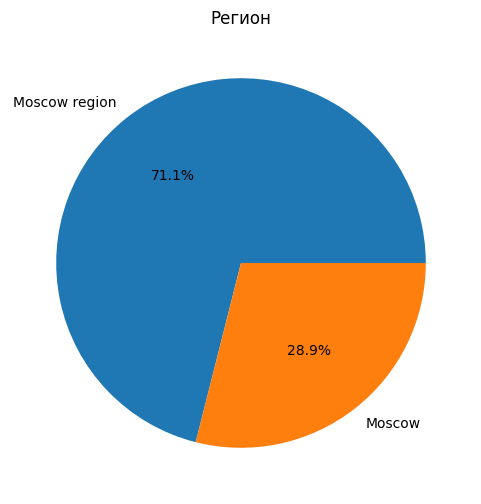

In [184]:
#Добавить нормальное название и описание
plt.figure(figsize=(6, 6))
plt.pie(data['Region'].value_counts(), labels = data['Region'].unique(), autopct='%1.1f%%')
plt.title('Регион')
plt.show()

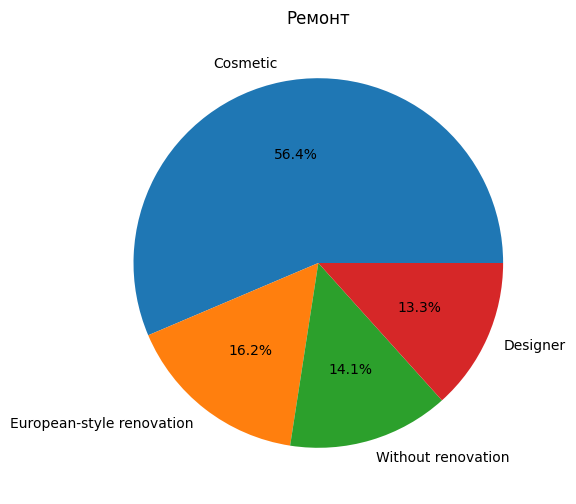

In [185]:
plt.figure(figsize=(6, 6))
plt.pie(data['Renovation'].value_counts(), labels = data['Renovation'].unique(), autopct='%1.1f%%')
plt.title('Ремонт')
plt.show()

**Выводы:**
1. В Датасете преобладают квартиры, находящиеся в Московской области
2. Квартиры, имеющие косметический ремонт являются преобладающим значением, покрывающим более половины датасета. Остальные значения представлены в близких пропорциях

### Распределение цен в зависимости от типа апартаментов

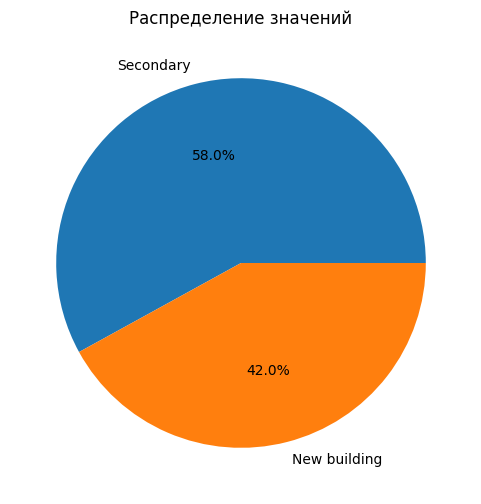

In [186]:
plt.figure(figsize=(6, 6))
plt.pie(data['Apartment type'].value_counts(), labels = data['Apartment type'].unique(), autopct='%1.1f%%')
plt.title('Распределение значений')
plt.show()

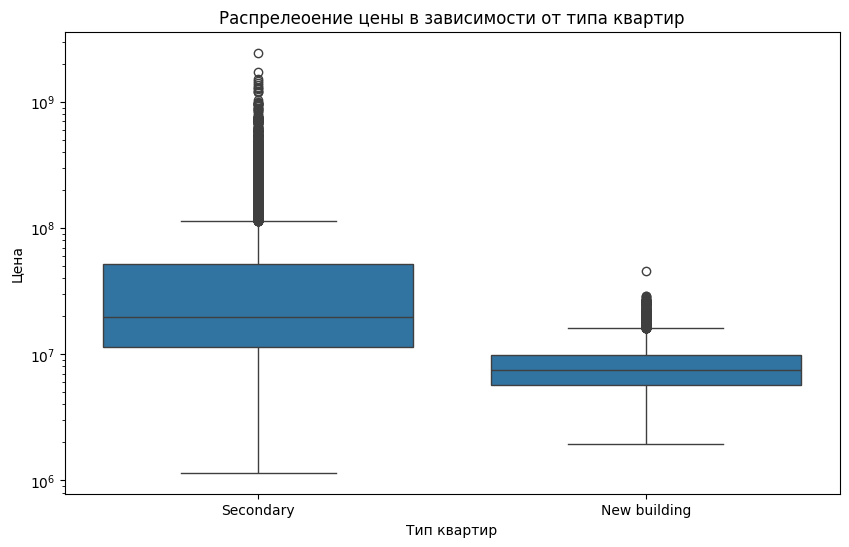

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Apartment type', y='Price', data=data)
plt.title('Распрелеоение цены в зависимости от типа квартир')
plt.ylabel('Цена')
plt.xlabel('Тип квартир')
plt.yscale('log')  
plt.show()

**Выводы**:  
1. Существует большая разница в ценах между двумя типами квартир, причем рынок вторичного жилья, как правило, имеет более высокие цены по сравнению с новостройками.
2. Вторичный рынок жилья имеет куда большую вариацию цен, а также более высокую медиану, которая указывает на более высокие цены в целом.
3. Оба распределения показывают выбросы, но более многочисленные и значимые во вторичном типе квартир

### Распределение количества квартир по площади и времени до метро

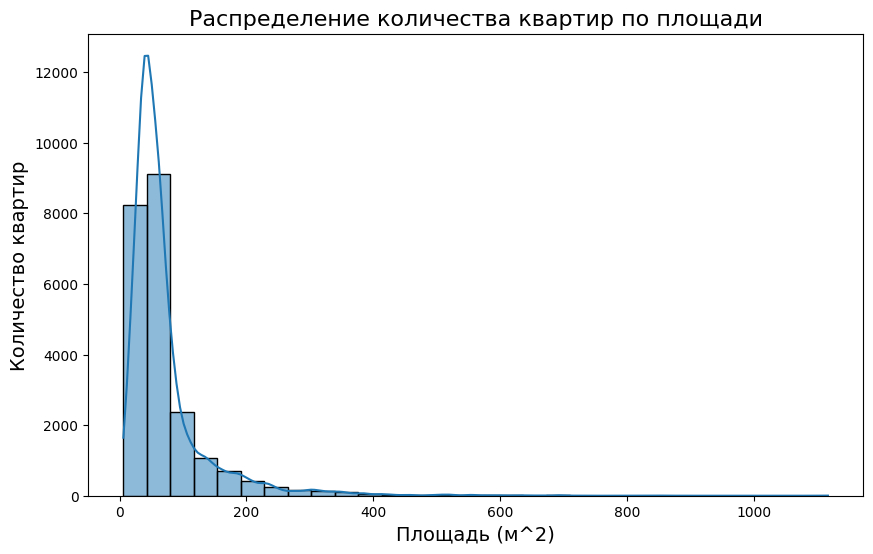

In [188]:
# Создание графика
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Area', bins=30, kde=True)

# Настройка заголовка и меток осей
plt.title('Распределение количества квартир по площади', fontsize=16)
plt.xlabel('Площадь (м^2)', fontsize=14)
plt.ylabel('Количество квартир', fontsize=14)

# Отображение графика
plt.show()


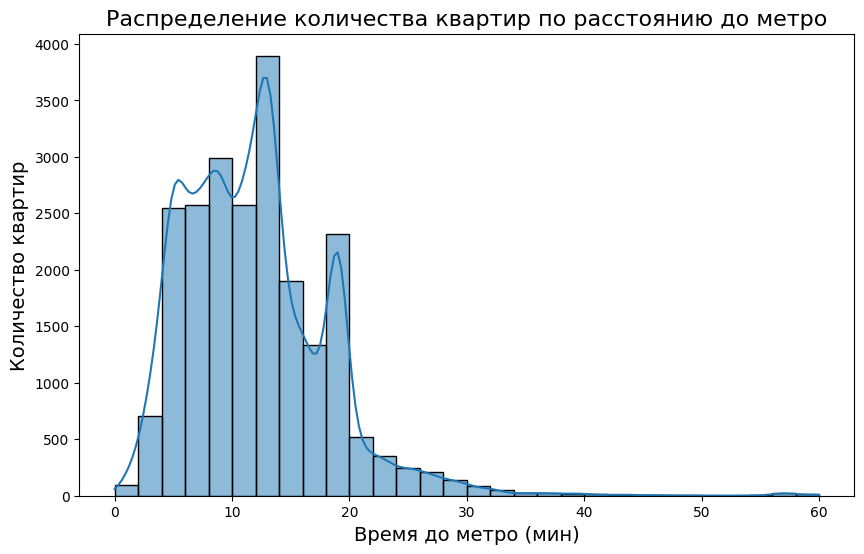

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание графика
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Minutes to metro', bins=30, kde=True)

# Настройка заголовка и меток осей
plt.title('Распределение количества квартир по расстоянию до метро', fontsize=16)
plt.xlabel('Время до метро (мин)', fontsize=14)
plt.ylabel('Количество квартир', fontsize=14)

# Отображение графика
plt.show()


**Выводы:** Распределения показывают длинный хвост справа, что указывает на наличие сильных выбросов

### Взаимосвязи между ценой и площадью, а также между временем до метро и ценой. Проверяем, есть ли кореляция

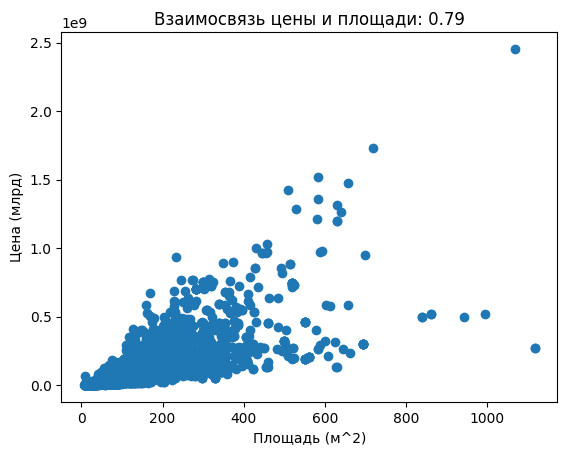

In [190]:
import matplotlib.pyplot as plt

# Создание фигуры и осей
fig, ax3 = plt.subplots()

# Построение scatterplot
ax3.scatter(data['Area'], data['Price'])

# Расчет коэффициента корреляции
correlation = round(data[['Area', 'Price']].corr()['Price'].loc['Area'], 2)

# Установка заголовка с использованием коэффициента корреляции
ax3.set_title(f'Взаимосвязь цены и площади: {correlation}')
ax3.set_xlabel('Площадь (м^2)')
ax3.set_ylabel('Цена (млрд)')

# Отображение графика
plt.show()

**Вывод**:
Взаимосвязь между признаками Цена и Площадь = 0.79, то есть между признаками существет линейная зависимоть

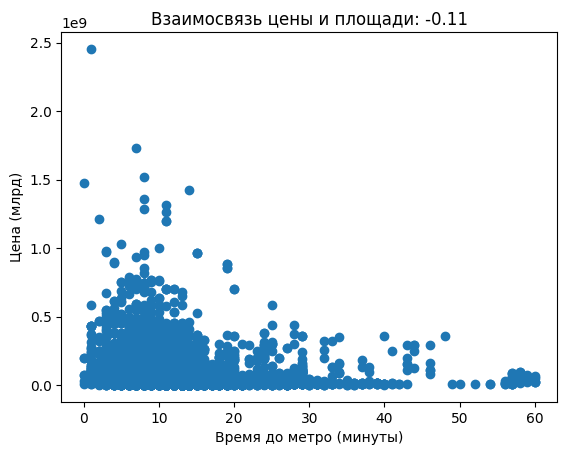

In [191]:
import matplotlib.pyplot as plt

# Создание фигуры и осей
fig, ax3 = plt.subplots()

# Построение scatterplot
ax3.scatter(data['Minutes to metro'], data['Price'])

# Расчет коэффициента корреляции
correlation = round(data[['Minutes to metro', 'Price']].corr()['Price'].loc['Minutes to metro'], 2)

# Установка заголовка с использованием коэффициента корреляции
ax3.set_title(f'Взаимосвязь цены и площади: {correlation}')
ax3.set_xlabel('Время до метро (минуты)')
ax3.set_ylabel('Цена (млрд)')

# Отображение графика
plt.show()


**Вывод:**
Кореляция -0.11 обозначает, что с увеличением одной переменной (в данном случае площади квартиры) значения другой переменной (цены) уменьшаются, и наоборот. Однако, поскольку коэффициент корреляции близок к нулю, эта связь может быть очень слабой и не очень значимой.

### Работа с аномальными значениями

После визуализации двх признаков (Цена и Площадь) и просмотра описательной статистики можно сказать, что так как во всех признаках есть выбросы. Так как выбросы присутствуют в каждом из рассмотренных признаков можем предположить, что все имеющиеся аномальные значения связаны между собой и имеют кореляцию с высокой ценой (т.е. не являются выбросами).
Для того, чтобы проверить эту гипотезу, рассмотрим количество аномальных значений в каждом из признаков, проверим, принадлежат ли они одним и тем же объектам

Проверяем количество аномальных значений в каждом из признаков:

In [192]:
#  Набор данных для записи количества аномальных значений
number_extreme = pd.DataFrame()
# Список для передачи в индекс
list_index = []
# Список для передачи значений
list_values = []

for i in describe.index:
    tmp = describe['75%'].loc[i]
    list_index.append(i)
    list_values.append(data[data[i] > tmp][i].count()) 

number_extreme.index = list_index
number_extreme['Количество экстремальных значений'] = list_values
number_extreme.sort_values(by='Количество экстремальных значений', ascending=False)

,Количество экстремальных значений
Price,5669
Area,5667
Living area,5655
Kitchen area,5617
Minutes to metro,5392
Floor,5249
Number of floors,4271
Number of rooms,3648


Видим, что все исследования значения, кроме количества комнат и номера этажа, имеют примерно одинаковое количество экстремальных значений. Теперь, проверим, принадлежат ли экстремальные значения в этих категориях одним и тем же объектам

In [193]:
selected_columns = data[['Area','Living area','Kitchen area', 'Minutes to metro','Floor']]
percentiles = selected_columns.quantile(0.75)
count2 = (((selected_columns > percentiles).sum(axis=1)) + (data['Price'] > describe['75%'].loc['Price']) >= 2).sum()
count3 = (((selected_columns > percentiles).sum(axis=1)) + (data['Price'] > describe['75%'].loc['Price']) >= 3).sum()
count4 = (((selected_columns > percentiles).sum(axis=1)) + (data['Price'] > describe['75%'].loc['Price']) >= 4).sum()
count5 = (((selected_columns > percentiles).sum(axis=1)) + (data['Price'] > describe['75%'].loc['Price']) >= 5).sum()
count6 = (((selected_columns > percentiles).sum(axis=1)) + (data['Price'] > describe['75%'].loc['Price']) >= 6).sum()
print("Количество квартир у которых цена и n параметров больше значения 75%")
print("n = 2: ", count2)
print("n = 3: ", count3)
print("n = 4: ", count4)
print("n = 5: ", count5)
print("n = 6: ", count6)

Количество квартир у которых цена и n параметров больше значения 75%
n = 2:  8116
n = 3:  5449
n = 4:  3744
n = 5:  1288
n = 6:  197


**Вывод:** присутствует большое количество квартир, у которых 2 и более параметров имеют аномально большие значения, однако утверждение о том, что скорее всего, большая часть аномальных значений принадлежат одному и тому же объекту неверно.
Однако, можем предположить, что аномальные значения соответствуют природе данных, т.е. не являются ошибками, не будем их выбрасывать из датасета на данном этапе

### Взаимосвязь между признаками. Проверка мультиколлинеарности среди числовых признаков

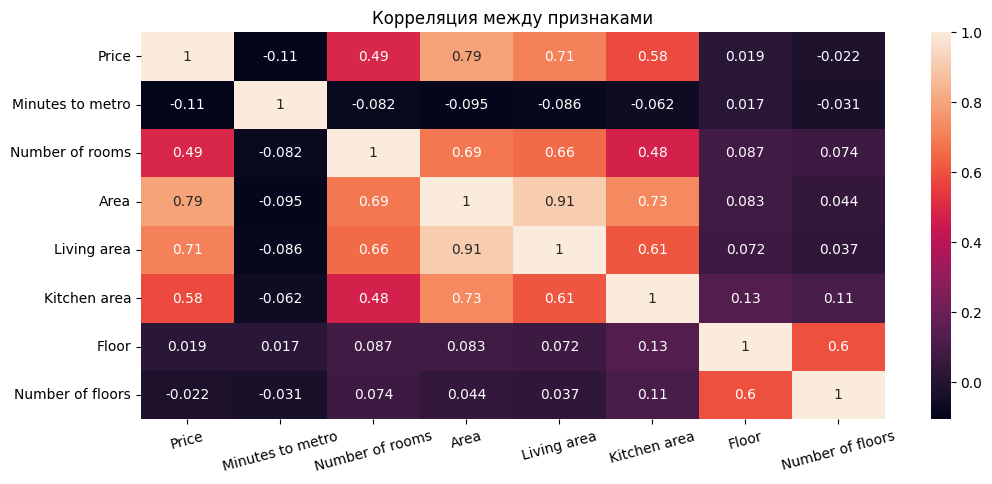

In [194]:
correlation = data.select_dtypes(include = ['float64', 'int64']).corr()

plt.figure(figsize=(12, 16))

#Матрица корреляции для всех признаков
ax1 = plt.subplot2grid((6, 2), (0, 0), rowspan=2, colspan=2)
sns.heatmap(correlation, annot=True, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)
ax1.set_title('Корреляция между признаками')
plt.show()


**Выводы:** 
1. Существует линейная зависимость между Ценой и признаками: Количество комнат, Площадь, Жилая площадь, Кухня площадь
2. Также, присутствует высокая мультиколлинеарность (признаки имеют близкие значения корреляции относительно остальных признаков, а также близкую к 1 корреляцию между собой) между Площадью и Жилой площадью. Удалим менее значимый признак, таковым является Жилая площадь, т.к. она имеет меньшую кореляцию с целевой переменной (Цена).